#### Assignment 4

- **Name: Madhavik Agarwal**
- **Roll No: 2018IMT-048**
- **Course: Machine Learning Lab**
- **Course Code: ITIT-4107**
- **Deadline: 23:59, 18 October 2021**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
### The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [29]:
data = pd.read_csv('ex1data1.txt', names = ['population','profit'])
x = data['population'].values
y = data['profit'].values

### 1. Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

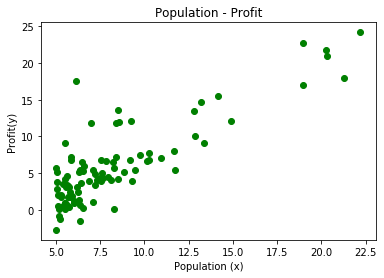

In [30]:
plt.subplot(1,1,1)
plt.title('Population - Profit')
plt.xlabel('Population (x)')
plt.ylabel('Profit(y)')
plt.scatter(x,y,color='green')

### 2. Consider a simple linear model with two parameters and one input variable and mean square error cost function to implement the gradient descent algorithm to find the intercepts. Assume a  suitable terminating condition. 

In [31]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

def gradientDescent(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [32]:
X_vals = np.append(np.ones((len(data),1)),x.reshape(len(data),1),axis=1)
y_vals = y.reshape(len(data),1)
theta = np.zeros((2,1))
print("Initial Cost: ", computeCost(X_vals,y_vals,theta))

alpha = 0.01
num_iters = 2000
theta_fm , minimization_vals = gradientDescent(X_vals, y_vals, theta, alpha, num_iters)
print("Final Cost: ", minimization_vals[-1])
print("Learning Rate: ", alpha)
print("Theta0: ", theta_fm[1][0])
print("Theta1: ", theta_fm[0][0])

Initial Cost:  32.072733877455676
Final Cost:  4.47802760987997
Learning Rate:  0.01
Theta0:  1.1822127747573767
Theta1:  -3.7880685727231094


### 3. Plot the model alongside the scatterplot to show the fit model.

Text(0, 0.5, 'Profit')

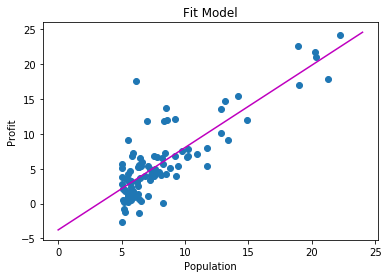

In [33]:
fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
ax.plot(x_value,y_value,color="m")
ax.set_title("Fit Model")
ax.set_xlabel("Population")
ax.set_ylabel("Profit")

### 4. Perform steps 1,2,3 in batch mode for varying values of alpha, learning rate and plot the results.

In [34]:
alpha_values = np.arange(0.001, 0.02, 0.002)
J_histories =[]
model_plots = []

for i in range(10):
    theta=np.zeros((2,1))
    alpha = alpha_values[i]
    theta,J_history = gradientDescent(X_vals,y_vals,theta,alpha,100)
    J_histories.append(J_history)
    model_plots.append([alpha, theta])

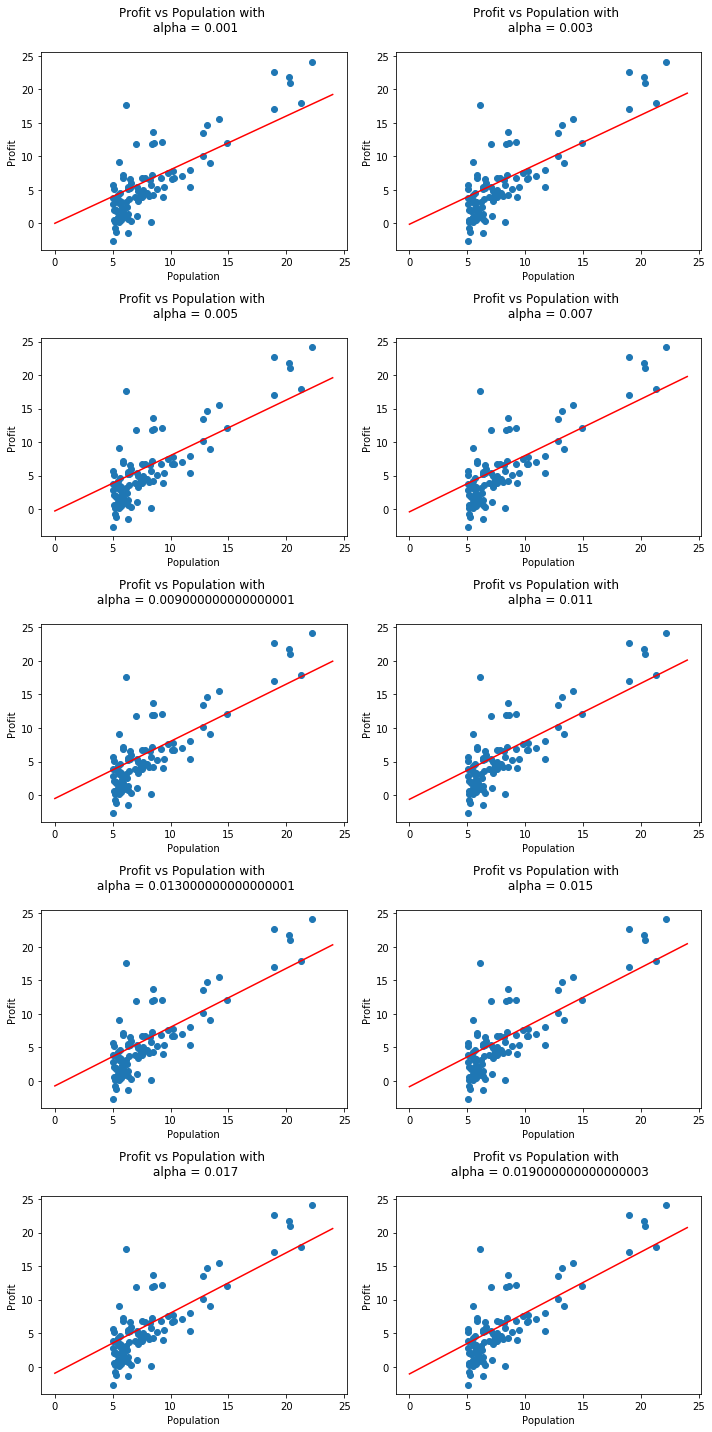

In [35]:
fig, ax = plt.subplots(5,2,figsize=(10,20))
itr = 0
for xi in range(5):
    for yi in range(2):
        ax[xi][yi].scatter(x,y)
        ax[xi][yi].set_title("Profit vs Population with \n alpha = {}\n".format(str(alpha_values[itr])))
        theta_m = model_plots[itr][1]
        x_value=[x for x in range(25)]
        y_value=[y*theta_m[1]+theta_m[0] for y in x_value]
        ax[xi][yi].plot(x_value,y_value,color="r")
        ax[xi][yi].set_xlabel("Population")
        ax[xi][yi].set_ylabel("Profit")
        itr += 1
fig.tight_layout()

### 5. For each of the experiments performed above in steps 1,2,3,4 with varying learning rates visualize the cost function as a contour plot as well as plot the values of parameters to visualize the stepwise traversion of the parameters on this contour plot.

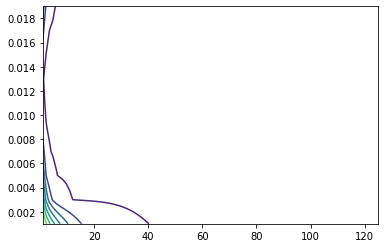

In [36]:
x = np.arange(1,125,1.25)
y = alpha_values

z = J_histories
fig, ax = plt.subplots(1, 1)
ax.contour(x,y,z)
plt.show()